# **SyriaTel Customer Churn**

## Business Understanding

SyriaTel, a telecommunication company is interested in knowing whether a customer will stop doing business with them. This goal of this analysis is to use customer data from this company to predict customer churn.

This analysis is focused on assisting SyriaTel to improve their customer service, by predicting customer churn and also identify contributing factors that lead to it.

## Data Understanding and Preparation

This analysis uses SyriaTel's customer information available in this [dataset.](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)

The dataset consists of 3333 entries in each of the 21 columns(20 feature columns and 1 target column)

In [40]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score, classification_report 
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.svm import SVC, NuSVC
from sklearn.cluster import KMeans
import xgboost
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the dataset
data = pd.read_csv('bigml.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# exploring the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the above information, we can see that our dataset does not contain any null values, so there is no need to include an imputer. The column description is as follows:

* `state`- state where the customer resides.
* `area code`- area code associated with the customer's phone number.
* `phone number`- customer's phone number.
* `account length`- duration of the customer's account with the telecom company (measured in months).
* `international plan`- Whether the customer has an international calling plan (Yes/No).
* `voice mail plan`- Whether the customer has a voicemail plan (Yes/No).
* `number vmail messages`- number of voicemail messages the customer has.
* `total day minutes`- total number of minutes the customer used during the daytime.
* `total day calls`- total number of calls the customer made during the daytime.
* `total day charge`- total charge (in currency) for daytime usage.
* `total eve minutes`- total number of minutes the customer used during the evening.
* `total eve calls`- total number of calls the customer made during the evening.
* `total eve charge`- total charge (in currency) for evening usage.
* `total night minutes`- total number of minutes the customer used during the nighttime.
* `total night calls`- total number of calls the customer made during the nighttime.
* `total night charge`- total charge (in currency) for nighttime usage.
* `total intl minutes`- total number of international minutes used by the customer.
* `total intl calls`- total number of international calls made by the customer.
* `total intl charge`- total charge (in currency) for international usage.
* `customer service calls`- number of customer service calls made by the customer.
* `churn`- the target variable indicating whether the customer churned (discontinued the service) or not (Yes/No)

To better understand the data, it is important to identify the categorical and numeric columns

### *Dropping Columns*
Some of the columns in the dataset do are not provide meaningful information about customer behavior, such as `account length` and `phone number`. The length of the account may not accurately represent how long the customer has been with the company without additional context. Similarly, the phone number is not relevant for predicting customer churn.

Other columns such as `area code` and `state` would limit the predictions all customers outside the specified loactions. Therefore, to ensure the model can generalize well to different regions, it was deemed appropriate to remove these columns from the analysis.

In [4]:
data.drop(['account length', 'phone number', 'area code', 'state'], axis=1, inplace=True)

In [6]:
# Identify categorical columns based on data types
categorical_columns = ['international plan', 'voice mail plan', 'churn']

# Identify numeric columns based on data types
numeric_columns = ['number vmail messages', 'total day minutes',
                   'total day calls', 'total day charge', 'total eve minutes', 'total eve calls',
                   'total eve charge', 'total night minutes', 'total night calls', 'total night charge',
                   'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


Visualizing the distribution of categorical and numeric columns 

##### Categorical Columns

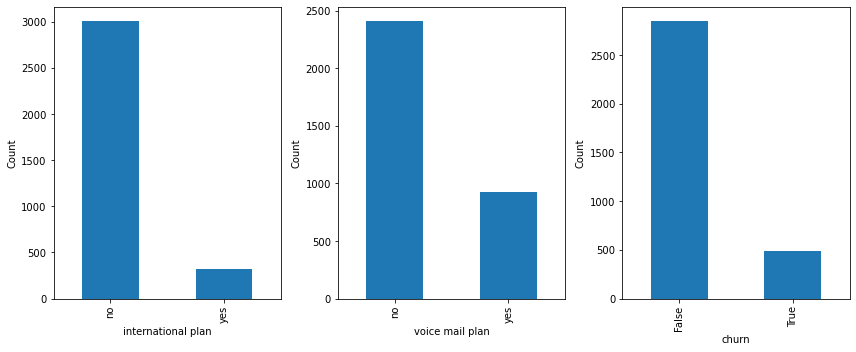

In [7]:
# Visualizing categorical columns
fig, axes = plt.subplots(ncols=len(categorical_columns), figsize=(12, 5))

for index, feature in enumerate(categorical_columns):
    data[feature].value_counts().plot.bar(ax=axes[index])
    axes[index].set_xlabel(feature)
    axes[index].set_ylabel('Count')

plt.tight_layout()
plt.show()


##### Numeric Columns

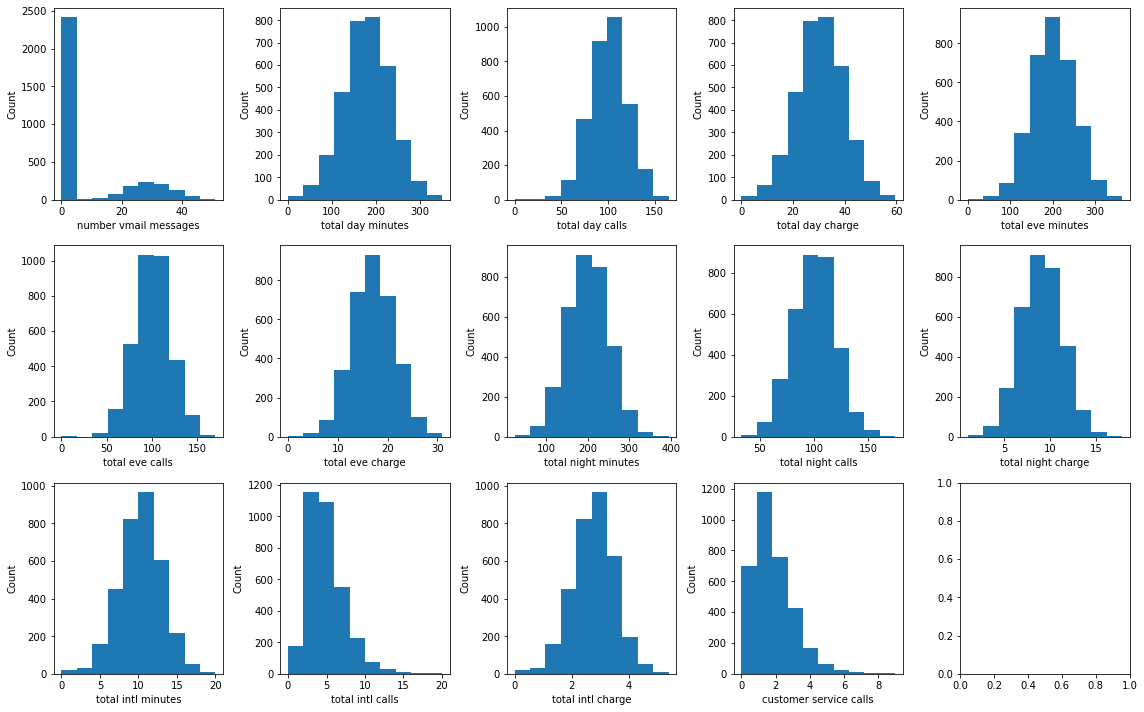

In [8]:
# Visualizing numeric columns
nrows = 3
ncols = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 10))

for index, feature in enumerate(numeric_columns):
    row = index // ncols
    col = index % ncols
    data[feature].plot.hist(ax=axes[row, col])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()


##### Target Variable

In [9]:
# target column value count
data.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

We can see that there is a class imbalance in the target variable, and would therefore be wise to use SMOTE to generate synthetic samples for the minority class in order to balance the observations. This will help in aoiding bias when fitting our model as it would struggle to accurately predict the minority class 

### *Defining `X` and `y`*

We'll consider `y` to be the target variable (churn) and everything else to be `X`.

In [10]:
y = data['churn']
X = data.drop('churn', axis=1)

### *Train-Test Split*

It is important that we split our data into training data and testing data before performing any preprocessing techniques to avoid data leakage, and to ensure that the test data remain untouched to represent the unseen data.

We shall use a `random_state` value of 0 to ensure code reproducibility

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Preprocessing

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 427 to 2732
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      2499 non-null   object 
 1   voice mail plan         2499 non-null   object 
 2   number vmail messages   2499 non-null   int64  
 3   total day minutes       2499 non-null   float64
 4   total day calls         2499 non-null   int64  
 5   total day charge        2499 non-null   float64
 6   total eve minutes       2499 non-null   float64
 7   total eve calls         2499 non-null   int64  
 8   total eve charge        2499 non-null   float64
 9   total night minutes     2499 non-null   float64
 10  total night calls       2499 non-null   int64  
 11  total night charge      2499 non-null   float64
 12  total intl minutes      2499 non-null   float64
 13  total intl calls        2499 non-null   int64  
 14  total intl charge       2499 non-null 

From the information above, some categorical variables such as `international plan` and `voice mail plan` can be one-hot encoded before fitting our model

**Encoding categorical features**

In [13]:
# Preprocessing - Encoding categorical features
categorical_columns = ['international plan', 'voice mail plan']

ohe = OneHotEncoder(sparse=False, drop='first')
X_train_encoded = pd.DataFrame(ohe.fit_transform(X_train[categorical_columns]))
X_test_encoded = pd.DataFrame(ohe.transform(X_test[categorical_columns]))

In [14]:
# Reindexing the encoded dataframes
X_train_encoded.index = X_train.index
X_test_encoded.index = X_test.index

In [15]:
# Dropping the original categorical columns from X_train and X_test
X_train.drop(categorical_columns, axis=1, inplace=True)
X_test.drop(categorical_columns, axis=1, inplace=True)

**Normalizing numeric features**

In [16]:
# Normalizing numeric features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

**Concatenating categorical and numeric features**

In [17]:
# Concatenating the encoded categorical features with the normalized numeric features
X_train_processed = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_processed = pd.concat([X_test_scaled, X_test_encoded], axis=1)

In [18]:
X_train_processed

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,0,1
427,2.341496,-1.385360,-1.764466,-1.385741,0.286999,-0.363320,0.287986,0.323706,1.419641,0.322345,-0.229738,1.852664,-0.233015,-0.423709,0.0,1.0
1656,1.460261,-1.366951,1.570597,-1.367332,0.587953,0.333484,0.586868,1.584141,1.013222,1.584720,0.162028,0.215677,0.162725,-0.423709,0.0,1.0
1042,1.166516,-1.595229,0.575056,-1.594743,-0.355948,1.378691,-0.355761,0.783301,1.673653,0.782586,-0.122893,-0.602816,-0.127484,-1.184922,1.0,1.0
1867,1.239953,0.201540,0.425724,0.201804,-1.016483,0.980517,-1.015600,0.528847,-2.034921,0.528357,-0.158508,-0.602816,-0.153867,-1.184922,1.0,1.0
346,1.827442,-0.341541,0.823941,-0.341816,-1.536312,-0.512635,-1.535196,1.189639,0.047977,1.190228,0.696255,0.215677,0.690377,-0.423709,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-0.595953,-1.978147,-1.266696,-1.978093,0.136522,0.831202,0.136245,-2.666623,-1.476095,-2.667029,-0.122893,-0.602816,-0.127484,-0.423709,0.0,0.0
3264,1.166516,-1.516068,-0.121823,-1.515691,0.109162,-1.657384,0.108656,0.266503,1.318036,0.265363,-1.547497,-1.012063,-1.552146,-1.184922,0.0,1.0
1653,-0.595953,-0.897508,-1.117365,-0.897349,0.353443,0.283713,0.352360,-0.893334,0.149581,-0.891814,0.304489,-1.012063,0.307829,-0.423709,1.0,0.0
2607,-0.595953,0.168402,-0.022269,0.168234,0.736475,0.333484,0.736309,-2.195192,-0.561652,-2.193639,-0.122893,-0.602816,-0.127484,1.098719,0.0,0.0


In [19]:
X_test_processed

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,0,1
405,-0.595953,1.549116,-0.470263,1.548944,-0.795653,0.731658,-0.794887,-0.047126,-1.374490,-0.045848,-0.336583,0.215677,-0.338545,-1.184922,1.0,0.0
118,2.047751,-1.223357,0.823941,-1.223305,-0.862098,-0.910809,-0.861561,-0.461354,0.911617,-0.462256,-0.087278,-0.602816,-0.087910,0.337505,0.0,1.0
710,-0.595953,0.278860,-1.515581,0.278691,0.294816,0.383256,0.294883,1.162024,0.962420,1.163928,0.803100,-0.193569,0.809099,1.098719,0.0,0.0
499,-0.595953,-0.091172,-0.470263,-0.091664,0.836142,0.433028,0.835170,-2.469372,-0.256838,-2.469783,-0.977655,-1.012063,-0.971728,-0.423709,0.0,0.0
2594,-0.595953,3.040287,-0.968033,3.040111,0.034901,0.283713,0.035085,0.325678,0.352791,0.326728,0.553794,1.443418,0.558464,-0.423709,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1.607134,-0.017534,0.226616,-0.018026,1.594389,-0.861037,1.593871,0.534765,-1.171281,0.532741,1.586632,0.215677,1.587386,-0.423709,0.0,1.0
3027,1.460261,0.739097,-0.221377,0.738927,1.645200,-1.408526,1.644451,0.039664,0.556001,0.041817,-0.300968,0.624924,-0.298971,1.859932,0.0,1.0
1366,-0.595953,-1.668867,-1.714689,-1.668381,-0.436072,0.184169,-0.436229,0.475589,0.810013,0.475759,0.731870,-1.421310,0.729951,1.098719,0.0,0.0
457,-0.595953,-0.374678,-0.072046,-0.374304,1.219174,-1.806699,1.219118,-1.682339,-1.526897,-1.680799,-0.194123,1.034171,-0.193441,0.337505,0.0,0.0


**Dealing with class imbalance**

In [20]:
# Handling class imbalance with SMOTE
smote = SMOTE(random_state=0)
X_train_processed_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

Converting categorical variables into dummy one-hot encoded variables:

We first create an instance of the **OneHotEncoder** class, and set the **handle_unknown** parameter set to *"ignore"* to handle unseen categories during encoding, and set the **sparse** parameter to *False* to return a dense array instead of a sparse matrix.

We then concatenate the one-hot encoded categorical features and the normalized numeric features

## Modeling

### 1. **Logistic Regression**

We first create an instance of the `LogisticRegression` class, that fits the logistic regression model on the training data, and assigns the fitted model to the logreg variable.

In [30]:
# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_processed_smote, y_train_smote)

#predicting using the logistic regression model
logreg_train = logreg.predict(X_train_processed_smote)
logreg_test = logreg.predict(X_test_processed)


##### **Model Evaluation**

The functions in the code below define four evaluation metrics: accuracy, precision, recall, and F1 score. 

In [23]:
#Accuracy
def accuracy(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_hat))

#Precision
def precision(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

#Recall
def recall(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)

#F1 score
def f1_score(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [32]:
print('LR Training Accuracy: ', accuracy(y_train, logreg_train))
print('LR Testing Accuracy: ', accuracy(y_test, logreg_test))
print()

print('LR Training Precision: ', precision(y_train, logreg_train))
print('LR Testing Precision: ', precision(y_test, logreg_test))
print()

print('LR Training Recall: ', recall(y_train, logreg_train))
print('LR Testing Recall: ', recall(y_test, logreg_test))
print()

print('LR Training F1-Score: ', f1_score(y_train, logreg_train))
print('LR Testing F1-Score: ', f1_score(y_test, logreg_test))

LR Training Accuracy:  0.4523697794462694
LR Testing Accuracy:  0.7541966426858513

LR Training Precision:  0.3673202614379085
LR Testing Precision:  0.3308270676691729

LR Training Recall:  0.7635869565217391
LR Testing Recall:  0.7652173913043478

LR Training F1-Score:  0.49602824360105907
LR Testing F1-Score:  0.46194225721784776


In this particular case, accuracy may not be the most suitable evaluation metric for assessing the performance of the model. Instead, precision and recall are more relevant metrics to consider. Precision measures the proportion of correctly predicted positive instances (customers who are correctly predicted to churn) out of all instances predicted as positive. Recall, on the other hand, calculates the proportion of correctly predicted positive instances out of all actual positive instances.

Precision helps evaluate the model's ability to correctly identify customers who are likely to churn, while recall captures the model's capability to identify as many actual churned customers as possible.

Furthermore, the F1 score provides a balanced measure that takes into account both precision and recall in that, a higher F1 score indicates a better trade-off between precision and recall.

### 2. **Decision Tree**

Considering the results provided, it seems that the logistic regression model is not performing well for this dataset. Therefore, it would be advisable to explore alternative classification models, such as a Decision Tree Classifier, that might better capture the complexities of the data and improve the predictive performance.

In [33]:
#fitting the model on the training data
dt = DecisionTreeClassifier()
dt.fit(X_train_processed_smote, y_train_smote)

# predict using the model
dt_train = dt.predict(X_train_processed_smote)
dt_test = dt.predict(X_test_processed)

In [34]:
#
print('DT Training Accuracy: ', accuracy(y_train, dt_train))
print('DT Testing Accuracy: ', accuracy(y_test, dt_test))
print()

print('DT Training Precision: ', precision(y_train, dt_train))
print('DT Testing Precision: ', precision(y_test, dt_test))
print()

print('DT Training Recall: ', recall(y_train, dt_train))
print('DT Testing Recall: ', recall(y_test, dt_test))
print()

print('DT Training F1-Score: ', f1_score(y_train, dt_train))
print('DT Testing F1-Score: ', f1_score(y_test, dt_test))

DT Training Accuracy:  0.5863444392304082
DT Testing Accuracy:  0.8908872901678657

DT Training Precision:  1.0
DT Testing Precision:  0.5759493670886076

DT Training Recall:  1.0
DT Testing Recall:  0.7913043478260869

DT Training F1-Score:  1.0
DT Testing F1-Score:  0.6666666666666667


Based on the comparison of the evaluation metrics between the logistic regression model and the decision tree classifier, the decision tree classifier appears to be a more promising model for the given task. It shows better performance across various metrics, indicating that it has learned the underlying patterns in the data more effectively.

However, while the decision tree classifier performs well on the testing dataset, it achieves perfect precision and recall on the training dataset, suggesting potential overfitting. Therefore, it is advisable to explore ensemble methods, such as random forests, which combine multiple decision trees to enhance predictive performance and mitigate the risk of overfitting.

### 3. **Random Forest**

While the decision tree model shows promising results, Random Forest has the potential to outperform individual decision trees and other models due to its ensemble nature which helps to capture a broader range of patterns in the data and make more robust predictions on unseen data, hence providing an improved generalization. 

Additionally, Random Forest provides a measure for feature importance, which indicates the relative contribution of each feature in making predictions.

In [35]:
# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_processed_smote, y_train_smote)

# Make predictions on the test data
rf_train = rf.predict(X_train_processed_smote)
rf_test = rf.predict(X_test_processed)

In [37]:
print('RF Training Accuracy: ', accuracy(y_train, rf_train))
print('RF Testing Accuracy: ', accuracy(y_test, rf_test))
print()

print('RF Training Precision: ', precision(y_train, rf_train))
print('RF Testing Precision: ', precision(y_test, rf_test))
print()

print('RF Training Recall: ', recall(y_train, rf_train))
print('RF Testing Recall: ', recall(y_test, rf_test))
print()

print('RF Training F1-Score: ', f1_score(y_train, rf_train))
print('RF Testing F1-Score: ', f1_score(y_test, rf_test))

RF Training Accuracy:  0.5863444392304082
RF Testing Accuracy:  0.9448441247002398

RF Training Precision:  1.0
RF Testing Precision:  0.7674418604651163

RF Training Recall:  1.0
RF Testing Recall:  0.8608695652173913

RF Training F1-Score:  1.0
RF Testing F1-Score:  0.8114754098360657


Compared to decision tree and logistic regression models, random forest model demonstrates the highest accuracy, precision, recall, and F1-Score on the testing dataset. This indicates that the Random Forest model is performing better overall and has the potential for further improvement through hyperparameter tuning.

In terms of generalization, the Random Forest model achieves a significantly higher testing accuracy (0.9448) compared to the Decision Tree (0.8909) and Logistic Regression (0.7542) models, suggesting that it generalizes better to unseen data, indicating its potential to benefit from hyperparameter tuning for further performance enhancement.

While the Decision tree model achieves a comparable training accuracy to the Random Forest model, its testing accuracy, precision, recall, and F1-Score are consistently lower. Therefore, the Random Forest model is more likely to benefit from hyperparameter tuning to optimize its performance.

### Hyperparameter tuning on the random forest model

By fine-tuning the hyperparameters of the Random Forest algorithm, we can further optimize its performance and potentially achieve even better results.

In this case, the parameters being tuned are:
* `n_estimators` - The number of trees in the Random Forest ensemble.
* `max_depth` - The maximum depth of each tree in the ensemble.
* `min_samples_split` - The minimum number of samples required to split an internal node.
* `min_samples_leaf` - The minimum number of samples required to be at a leaf node.

In [44]:
# Defining the parameter grid to search through
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating a grid search object using F1-score as the scoring metric and 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', cv=5)

# Fitting the grid search to the processes training data
grid_search.fit(X_train_processed_smote, y_train_smote)

# Getting the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Printing the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


KeyboardInterrupt: 